In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170500096/170498071 [==============================] - 4s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Compile
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 43s 7ms/step - loss: 1.2907 - accuracy: 0.5552 - val_loss: 1.0901 - val_accuracy: 0.6264
Epoch 2/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8466 - accuracy: 0.7066 - val_loss: 0.8134 - val_accuracy: 0.7203
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6862 - accuracy: 0.7625 - val_loss: 0.9510 - val_accuracy: 0.6855
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5828 - accuracy: 0.7986 - val_loss: 0.6555 - val_accuracy: 0.7852
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4943 - accuracy: 0.8288 - val_loss: 0.7075 - val_accuracy: 0.7640
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4270 - accuracy: 0.8538 - val_loss: 0.6165 - val_accuracy: 0.8048
Epoch 7/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3593 - accuracy: 0.8759 - val_loss: 0.6735 - val_ac

In [8]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.5360 - accuracy: 0.8287 - val_loss: 0.4750 - val_accuracy: 0.8480
Epoch 2/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.4412 - accuracy: 0.8557 - val_loss: 0.4813 - val_accuracy: 0.8451
Epoch 3/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.4004 - accuracy: 0.8653 - val_loss: 0.4479 - val_accuracy: 0.8546
Epoch 4/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3817 - accuracy: 0.8723 - val_loss: 0.4656 - val_accuracy: 0.8493
Epoch 5/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3621 - accuracy: 0.8794 - val_loss: 0.4762 - val_accuracy: 0.8533
Epoch 6/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3517 - accuracy: 0.8825 - val_loss: 0.4355 - val_accuracy: 0.8561
Epoch 7/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3314 - accuracy: 0.8899 - val_loss: 0.4549 -

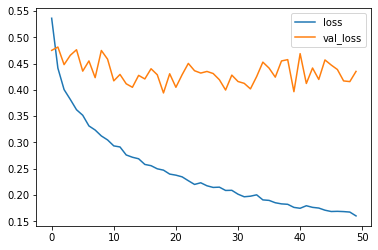

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

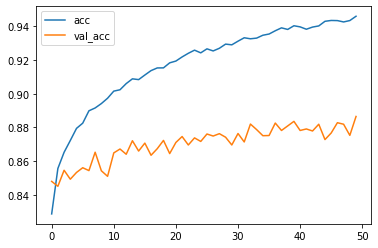

In [10]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[909  13  26   9   9   0   4   5  15  10]
 [  4 959   0   2   1   1   1   1   2  29]
 [ 21   1 869  19  37  13  30   6   3   1]
 [  9   6  44 756  42  73  41  19   5   5]
 [  8   1  28  17 890   9  16  28   1   2]
 [  6   1  24  88  30 799  14  33   1   4]
 [  3   0  33  22   7   4 927   3   1   0]
 [  6   3  10  13  21  14   4 924   1   4]
 [ 45  11   6   3   1   0   1   3 912  18]
 [ 10  49   2   6   0   0   7   1   5 920]]


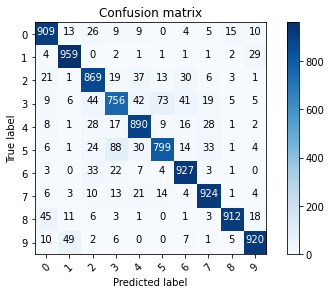

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [12]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

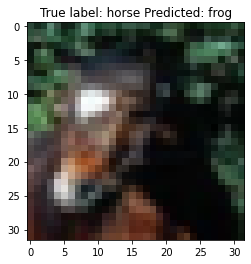

In [15]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [ ]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 